In [1]:
"""
@Josh Boquiren
OTIS Lab MUSC
4.5.2023

README: 
-simple program to plot all polylines on the same graph

"""

'\n@Josh Boquiren\nOTIS Lab MUSC\n4.5.2023\n\nREADME: \n-simple program to plot all polylines on the same graph\n\n'

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#initialize directories

basedir = r'C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\Josh\Project Datasets\PFC Self-Admin Analysis\PFC Self Admin Data'

earlyACQ = r'C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\Josh\Project Datasets\PFC Self-Admin Analysis\PFC Self Admin Data/EarlyAcq'
middleACQ = r'C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\Josh\Project Datasets\PFC Self-Admin Analysis\PFC Self Admin Data/MidAcq'
lateACQ = r'C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\Josh\Project Datasets\PFC Self-Admin Analysis\PFC Self Admin Data\LateAcq'

earlyEXT = r'C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\Josh\Project Datasets\PFC Self-Admin Analysis\PFC Self Admin Data/EarlyExt'
lateEXT = r'C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\Josh\Project Datasets\PFC Self-Admin Analysis\PFC Self Admin Data\LastExt'

CUE = r'C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\Josh\Project Datasets\PFC Self-Admin Analysis\PFC Self Admin Data/CueRein'
DRUG = r'C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\Josh\Project Datasets\PFC Self-Admin Analysis\PFC Self Admin Data/DrugRein'
TMT = r'C:\Users\jboqu\Dropbox\2P Imaging Projects\Beth\Josh\Project Datasets\PFC Self-Admin Analysis\PFC Self Admin Data\TMTRein'


In [4]:
#ACQ aoi's
early_acq_aoi = [
    'CTL1',
    'ER-L1','ER-L2',
    'IG-19',
    'LCDD-PGa1','LCDD-PGa3','LCDD-PGa4','LCDD-PGa5','LCDD-PGa6',
    'LCDD-PGa-T1','LCDD-PGa-T2','LCDD-PGa-T3','LCDD-PGa-T4','LCDD-PGa-T5',
    'PGa-T1','PGa-T2','PGa-T3'
    ]  
middle_acq_aoi = [
    'CTL1',
    'ER-L1','ER-L2',
    'IG-19',
    'LCDD-PGa1','LCDD-PGa3','LCDD-PGa4','LCDD-PGa5','LCDD-PGa6',
    'LCDD-PGa-T1','LCDD-PGa-T2','LCDD-PGa-T3','LCDD-PGa-T4','LCDD-PGa-T5',
    'PGa-T1','PGa-T2','PGa-T3'
    ]  
late_acq_aoi = [
    'CTL1',
    'ER-L1','ER-L2',
    'IG-19',
    'LCDD-PGa1','LCDD-PGa3','LCDD-PGa4','LCDD-PGa5','LCDD-PGa6',
    'LCDD-PGa-T1','LCDD-PGa-T2','LCDD-PGa-T3','LCDD-PGa-T4','LCDD-PGa-T5',
    'PGa-T1','PGa-T2','PGa-T3'
    ]  

#EXT aoi's
early_ext_aoi = [
    'CTL1',
    'ER-L1','ER-L2',
    'LCDD-PGa1','LCDD-PGa4','LCDD-PGa6',
    'LCDD-PGa-T1','LCDD-PGa-T3','LCDD-PGa-T4',
    'PGa-T1','PGa-T2','PGa-T3'
    ]  
middle_ext_aoi = [ #really late animals, but coded as middle
    'CTL1',
    'ER-L1','ER-L2',
    'LCDD-PGa1','LCDD-PGa5',
    'LCDD-PGa-T2','LCDD-PGa-T3','LCDD-PGa-T4','LCDD-PGa-T5',
    'PGa-T1','PGa-T2'
    ]  
late_ext_aoi = []


#RST aoi's
early_rst_aoi = [
    'LCDD-PGa4','LCDD-PGa5','LCDD-PGa6',
    'PGa-T1','PGa-T2','PGa-T3'
    ]  
middle_rst_aoi = [
    'LCDD-PGa4','LCDD-PGa5','LCDD-PGa6',
    'PGa-T1','PGa-T2' #omit 'PGa-T3' from CNO
    ]  
late_rst_aoi = [
    'LCDD-PGa4','LCDD-PGa5','LCDD-PGa6',
    'PGa-T1','PGa-T2','PGa-T3'
    ] 

In [5]:
#frame rate variables
frameaveraging = 4
timebetweenframes = 33.3333
framerate = 30
framerate = timebetweenframes/frameaveraging #raw frame rate
averagedframerate = timebetweenframes/frameaveraging #averaged frame rate

#window size variables
pre_window_size = int(10*framerate) #How many frames per trial before origin to be plotted?
window_size =  int((pre_window_size*2)+(3*framerate)) #How many frames do you want to plot around the origin?
post_window_size = window_size - pre_window_size
baselinefirstframe = 0
baselinelastframe = int(1*framerate)
infusionframe = int(pre_window_size+(3*framerate))

In [9]:
"""ACQUISITION"""
#initializes np array to stack on top of
population_data_ACQ = np.nan*np.ones((1, window_size))
for animal in early_acq_aoi:
    print('>>>', animal)
    FOVs = next(os.walk(os.path.join(earlyACQ, animal)))[1]
    for fov in sorted(FOVs):
        #load in data
        try:
                active_data = np.load(os.path.join(earlyACQ, animal, fov, "active_data.npy"))
                population_data_ACQ = np.vstack((population_data_ACQ, active_data))
        except:
               print('***ERROR: no files!***')

#num neurons is length of data - 1
numneurons_early_ACQ = population_data_ACQ.shape[0]-1 

#slices population data to not include first row
population_data_ACQ = population_data_ACQ[1:,:]

#calculating population active data - baseline
baseline = np.nanmean(population_data_ACQ[:,baselinefirstframe:baselinelastframe], axis=1)
population_data_ACQ = population_data_ACQ - baseline[:,None]

#other variables
numrois_early_active = population_data_ACQ.shape[0]
tempresponse = np.nanmean(population_data_ACQ[:,pre_window_size-(1*int(framerate)):pre_window_size+1*int(framerate)], axis=1)
sortresponse_early_ACQ = np.argsort(tempresponse)[::-1]

#creating new variables for combined early active and inactive data because pop_active/pop_inactive will be overwritten
early_ACQ = population_data_ACQ

#initializes np array to stack on top of
population_data_ACQ = np.nan*np.ones((1, window_size))
for animal in middle_acq_aoi:
    print('>>>', animal)
    FOVs = next(os.walk(os.path.join(middleACQ, animal)))[1]
    for fov in sorted(FOVs):
        #load in data
        try:
                active_data = np.load(os.path.join(middleACQ, animal, fov, "active_data.npy"))
                population_data_ACQ = np.vstack((population_data_ACQ, active_data))
        except:
               print('***ERROR: no files!***')

#num neurons is length of data - 1
numneurons_middle_ACQ = population_data_ACQ.shape[0]-1 

#slices population data to not include first row
population_data_ACQ = population_data_ACQ[1:,:]

#calculating population active data - baseline
baseline = np.nanmean(population_data_ACQ[:,baselinefirstframe:baselinelastframe], axis=1)
population_data_ACQ = population_data_ACQ - baseline[:,None]

#other variables
numrois_middle_active = population_data_ACQ.shape[0]
tempresponse = np.nanmean(population_data_ACQ[:,pre_window_size-(1*int(framerate)):pre_window_size+1*int(framerate)], axis=1)
sortresponse_middle_ACQ = np.argsort(tempresponse)[::-1]

#creating new variables for combined early active and inactive data because pop_active/pop_inactive will be overwritten
middle_ACQ = population_data_ACQ

#initializes np array to stack on top of
population_data_ACQ = np.nan*np.ones((1, window_size))
for animal in late_acq_aoi:
    print('>>>', animal)
    FOVs = next(os.walk(os.path.join(lateACQ, animal)))[1]
    for fov in sorted(FOVs):
        #load in data
        try:
                active_data = np.load(os.path.join(lateACQ, animal, fov, "active_data.npy"))
                population_data_ACQ = np.vstack((population_data_ACQ, active_data))
        except:
               print('***ERROR: no files!***')

#num neurons is length of data - 1
numneurons_late_ACQ = population_data_ACQ.shape[0]-1 

#slices population data to not include first row
population_data_ACQ = population_data_ACQ[1:,:]

#calculating population active data - baseline
baseline = np.nanmean(population_data_ACQ[:,baselinefirstframe:baselinelastframe], axis=1)
population_data_ACQ = population_data_ACQ - baseline[:,None]

#other variables
numrois_late_active = population_data_ACQ.shape[0]
tempresponse = np.nanmean(population_data_ACQ[:,pre_window_size-(1*int(framerate)):pre_window_size+1*int(framerate)], axis=1)
sortresponse_late_active = np.argsort(tempresponse)[::-1]

#creating new variables for combined early active and inactive data because pop_active/pop_inactive will be overwritten
late_ACQ = population_data_ACQ



"""EXTINCTION"""
#initializes np array to stack on top of
population_data_EXT = np.nan*np.ones((1, window_size))
for animal in early_ext_aoi:
    print('>>>', animal)
    FOVs = next(os.walk(os.path.join(earlyEXT, animal)))[1]
    for fov in sorted(FOVs):
        #load in data
        try:
                active_data = np.load(os.path.join(earlyEXT, animal, fov, "active_data.npy"))
                population_data_EXT = np.vstack((population_data_EXT, active_data))
        except:
               print('***ERROR: no files!***')

#num neurons is length of data - 1
numneurons_early_EXT = population_data_EXT.shape[0]-1 

#slices population data to not include first row
population_data_EXT = population_data_EXT[1:,:]

#calculating population active data - baseline
baseline = np.nanmean(population_data_EXT[:,baselinefirstframe:baselinelastframe], axis=1)
population_data_EXT = population_data_EXT - baseline[:,None]

#other variables
numrois_early_active = population_data_EXT.shape[0]
tempresponse = np.nanmean(population_data_EXT[:,pre_window_size-(1*int(framerate)):pre_window_size+1*int(framerate)], axis=1)
sortresponse_early_EXT = np.argsort(tempresponse)[::-1]

#creating new variables for combined early active and inactive data because pop_active/pop_inactive will be overwritten
early_EXT = population_data_EXT

#initializes np array to stack on top of
population_data_EXT = np.nan*np.ones((1, window_size))
for animal in middle_ext_aoi:
    print('>>>', animal)
    FOVs = next(os.walk(os.path.join(lateEXT, animal)))[1]
    for fov in sorted(FOVs):
        #load in data
        try:
                active_data = np.load(os.path.join(lateEXT, animal, fov, "active_data.npy"))
                population_data_EXT = np.vstack((population_data_EXT, active_data))
        except:
               print('***ERROR: no files!***')

#num neurons is length of data - 1
numneurons_middle_EXT = population_data_ACQ.shape[0]-1 

#slices population data to not include first row
population_data_EXT = population_data_EXT[1:,:]

#calculating population active data - baseline
baseline = np.nanmean(population_data_EXT[:,baselinefirstframe:baselinelastframe], axis=1)
population_data_ACQ = population_data_EXT - baseline[:,None]

#other variables
numrois_middle_active = population_data_EXT.shape[0]
tempresponse = np.nanmean(population_data_ACQ[:,pre_window_size-(1*int(framerate)):pre_window_size+1*int(framerate)], axis=1)
sortresponse_middle_EXT = np.argsort(tempresponse)[::-1]

#creating new variables for combined early active and inactive data because pop_active/pop_inactive will be overwritten
middle_EXT = population_data_EXT



"""REINSTATEMENT"""
#initializes np array to stack on top of
population_data_CUE = np.nan*np.ones((1, window_size))
for animal in early_rst_aoi:
    print('>>>', animal)
    FOVs = next(os.walk(os.path.join(CUE, animal)))[1]
    for fov in sorted(FOVs):
        #load in data
        try:
                active_data = np.load(os.path.join(CUE, animal, fov, "active_data.npy"))
                population_data_CUE = np.vstack((population_data_CUE, active_data))
        except:
               print('***ERROR: no files!***')

#num neurons is length of data - 1
numneurons_early_CUE = population_data_CUE.shape[0]-1 

#slices population data to not include first row
population_data_CUE = population_data_CUE[1:,:]

#calculating population active data - baseline
baseline = np.nanmean(population_data_CUE[:,baselinefirstframe:baselinelastframe], axis=1)
population_data_CUE = population_data_CUE - baseline[:,None]

#other variables
numrois_early_active = population_data_CUE.shape[0]
tempresponse = np.nanmean(population_data_CUE[:,pre_window_size-(1*int(framerate)):pre_window_size+1*int(framerate)], axis=1)
sortresponse_early_CUE = np.argsort(tempresponse)[::-1]

#creating new variables for combined early active and inactive data because pop_active/pop_inactive will be overwritten
early_CUE = population_data_CUE

#initializes np array to stack on top of
population_data_DRUG = np.nan*np.ones((1, window_size))
for animal in middle_rst_aoi:
    print('>>>', animal)
    FOVs = next(os.walk(os.path.join(DRUG, animal)))[1]
    for fov in sorted(FOVs):
        #load in data
        try:
                active_data = np.load(os.path.join(DRUG, animal, fov, "active_data.npy"))
                population_data_DRUG = np.vstack((population_data_DRUG, active_data))
        except:
               print('***ERROR: no files!***')

#num neurons is length of data - 1
numneurons_middle_DRUG = population_data_DRUG.shape[0]-1 

#slices population data to not include first row
population_data_DRUG = population_data_DRUG[1:,:]

#calculating population active data - baseline
baseline = np.nanmean(population_data_DRUG[:,baselinefirstframe:baselinelastframe], axis=1)
population_data_DRUG = population_data_DRUG - baseline[:,None]

#other variables
numrois_middle_active = population_data_DRUG.shape[0]
tempresponse = np.nanmean(population_data_DRUG[:,pre_window_size-(1*int(framerate)):pre_window_size+1*int(framerate)], axis=1)
sortresponse_middle_DRUG = np.argsort(tempresponse)[::-1]

#creating new variables for combined early active and inactive data because pop_active/pop_inactive will be overwritten
middle_DRUG = population_data_DRUG

#initializes np array to stack on top of
population_data_TMT = np.nan*np.ones((1, window_size))
for animal in late_rst_aoi:
    print('>>>', animal)
    FOVs = next(os.walk(os.path.join(TMT, animal)))[1]
    for fov in sorted(FOVs):
        #load in data
        try:
                active_data = np.load(os.path.join(TMT, animal, fov, "active_data.npy"))
                population_data_ACQ = np.vstack((population_data_TMT, active_data))
        except:
               print('***ERROR: no files!***')

#num neurons is length of data - 1
numneurons_late_TMT = population_data_TMT.shape[0]-1 

#slices population data to not include first row
population_data_TMT = population_data_TMT[1:,:]

#calculating population active data - baseline
baseline = np.nanmean(population_data_TMT[:,baselinefirstframe:baselinelastframe], axis=1)
population_data_TMT = population_data_TMT - baseline[:,None]

#other variables
numrois_late_active = population_data_TMT.shape[0]
tempresponse = np.nanmean(population_data_TMT[:,pre_window_size-(1*int(framerate)):pre_window_size+1*int(framerate)], axis=1)
sortresponse_late_active = np.argsort(tempresponse)[::-1]

#creating new variables for combined early active and inactive data because pop_active/pop_inactive will be overwritten
late_TMT = population_data_TMT

>>> CTL1
>>> ER-L1
>>> ER-L2
>>> IG-19
>>> LCDD-PGa1
>>> LCDD-PGa3
>>> LCDD-PGa4
>>> LCDD-PGa5
>>> LCDD-PGa6
>>> LCDD-PGa-T1
>>> LCDD-PGa-T2
>>> LCDD-PGa-T3
>>> LCDD-PGa-T4
>>> LCDD-PGa-T5
>>> PGa-T1
>>> PGa-T2
>>> PGa-T3
>>> CTL1
>>> ER-L1
>>> ER-L2
>>> IG-19
>>> LCDD-PGa1
>>> LCDD-PGa3
>>> LCDD-PGa4
>>> LCDD-PGa5
>>> LCDD-PGa6
>>> LCDD-PGa-T1
>>> LCDD-PGa-T2
>>> LCDD-PGa-T3
>>> LCDD-PGa-T4
>>> LCDD-PGa-T5
>>> PGa-T1
>>> PGa-T2
>>> PGa-T3
>>> CTL1
>>> ER-L1
>>> ER-L2
>>> IG-19
>>> LCDD-PGa1
>>> LCDD-PGa3
>>> LCDD-PGa4
>>> LCDD-PGa5
>>> LCDD-PGa6
>>> LCDD-PGa-T1
>>> LCDD-PGa-T2
>>> LCDD-PGa-T3
>>> LCDD-PGa-T4
>>> LCDD-PGa-T5
>>> PGa-T1
>>> PGa-T2
>>> PGa-T3
>>> CTL1
>>> ER-L1
>>> ER-L2
>>> LCDD-PGa1
>>> LCDD-PGa4
>>> LCDD-PGa6
>>> LCDD-PGa-T1
>>> LCDD-PGa-T3
>>> LCDD-PGa-T4
>>> PGa-T1
>>> PGa-T2
>>> PGa-T3
>>> CTL1
>>> ER-L1
>>> ER-L2
>>> LCDD-PGa1
>>> LCDD-PGa5
>>> LCDD-PGa-T2
>>> LCDD-PGa-T3
>>> LCDD-PGa-T4
>>> LCDD-PGa-T5
>>> PGa-T1
>>> PGa-T2
>>> LCDD-PGa4
>>> LCDD-PGa5
>>> LCDD-PG

StopIteration: 

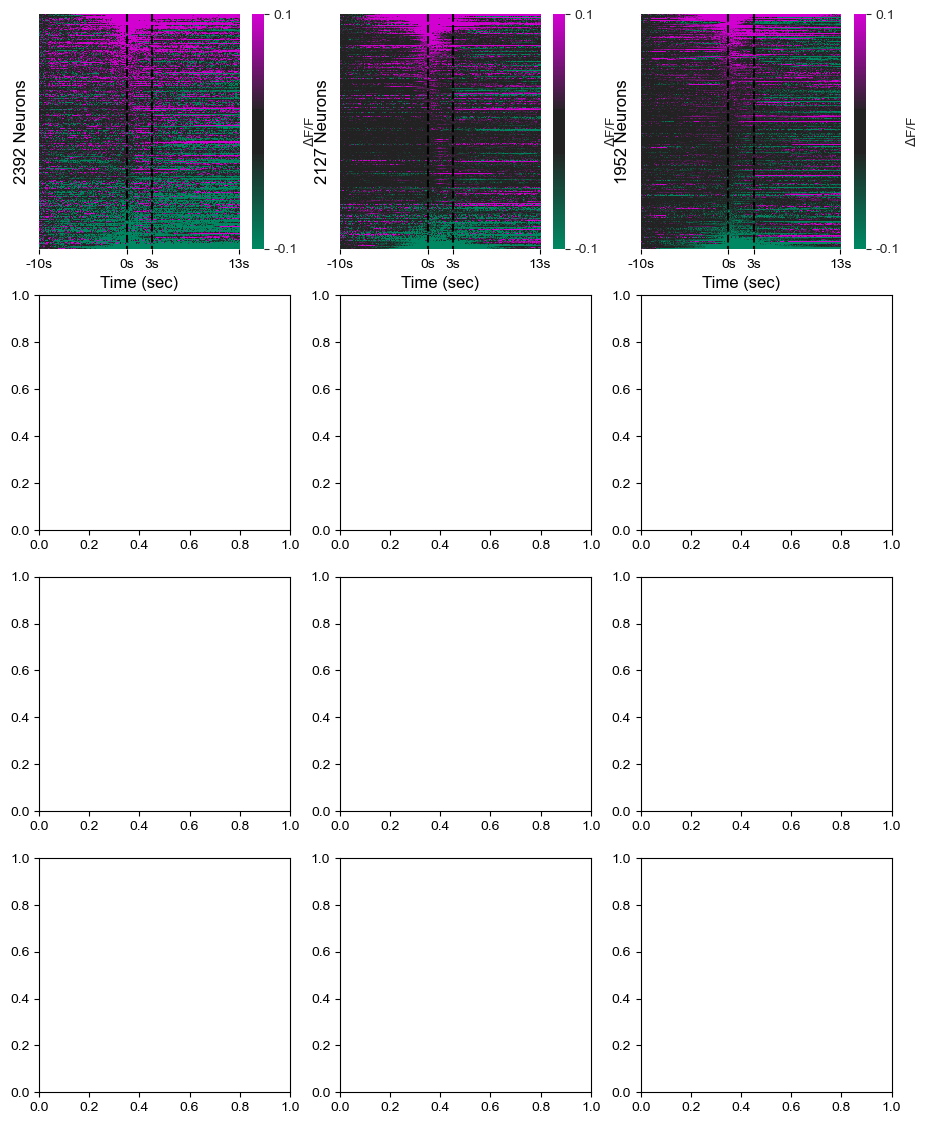

In [7]:
#initialize the plot
fig, axs = plt.subplots(4, 3, figsize=(11, 14)) #2 rows and 3 columns of graphs; may end up with blank column
sns.set_style('white')

#setting max/min variables
cmax = .1
cmin = -cmax
ymax = .1
ymin = -ymax

#early active plots
ax = axs[0,0]

#heatmap
hm = sns.heatmap(early_ACQ[sortresponse_early_ACQ,:], ax=ax, vmax = cmax, vmin = cmin, linewidth=0, 
        cmap=sns.diverging_palette(154, 308,n=230,s=100,sep=50,center='dark'),
        cbar_kws={'label': '$\Delta$F/F'}, xticklabels=False,  yticklabels=False) #sets tick label increments

#color bar
cbar = hm.collections[0].colorbar
cbar.set_ticks([-.1,.1])
cbar.set_ticklabels([cmin, cmax])
ax.set(xticks=[0, pre_window_size, infusionframe, window_size-1])
ax.set(xticklabels=["-10s", "0s", "3s", "13s"])

#lines and labels
ax.grid(False)
#ax.set_title(plot_titles[0]+"-ACTIVE", fontweight="bold", fontsize=14)
ax.set_ylabel('%s Neurons' %numneurons_early_ACQ, fontsize=12)
ax.set_xlabel('Time (sec)', fontsize=12)
ax.plot([pre_window_size, pre_window_size],
        [0, numrois_early_active], '--k', linewidth=1.5)
ax.plot([infusionframe, infusionframe],
        [0, numrois_early_active], '--k', linewidth=1.5) 

##line plot
#ax = axs[1,0]
#ax.plot(early_active_mean)
#ax.set_ylim([-.07, .07])
#ax.plot([0, window_size], [0,0], '--k', linewidth=0.5) 
#ax.axvline(pre_window_size, color='black', linestyle='--')
#ax.axvline(infusionframe, color='black', linestyle='--')


#middle active plots
ax = axs[0,1]

#heatmap
hm = sns.heatmap(middle_ACQ[sortresponse_middle_ACQ,:], ax=ax, vmax = cmax, vmin = cmin, linewidth=0, 
        cmap=sns.diverging_palette(154, 308,n=230,s=100,sep=50,center='dark'),
        cbar_kws={'label': '$\Delta$F/F'}, xticklabels=False,  yticklabels=False) #sets tick label increments

#color bar
cbar = hm.collections[0].colorbar
cbar.set_ticks([-.1,.1])
cbar.set_ticklabels([cmin, cmax])
ax.set(xticks=[0, pre_window_size, infusionframe, window_size-1])
ax.set(xticklabels=["-10s", "0s", "3s", "13s"])

#lines and labels
ax.grid(False)
#ax.set_title(plot_titles[1]+"-ACTIVE", fontweight="bold", fontsize=14)
ax.set_ylabel('%s Neurons' %numneurons_middle_ACQ, fontsize=12)
ax.set_xlabel('Time (sec)', fontsize=12)
ax.plot([pre_window_size, pre_window_size],
        [0, numrois_middle_active], '--k', linewidth=1.5)
ax.plot([infusionframe, infusionframe],
        [0, numrois_middle_active], '--k', linewidth=1.5) 

##line plot
#ax = axs[1,1]
#ax.plot(middle_active_mean)
#ax.set_ylim([-.07, .07])
#ax.plot([0, window_size], [0,0], '--k', linewidth=0.5) 
#ax.axvline(pre_window_size, color='black', linestyle='--')
#ax.axvline(infusionframe, color='black', linestyle='--')



#late active plots
ax = axs[0,2]

#heatmap
hm = sns.heatmap(late_ACQ[sortresponse_late_active,:], ax=ax, vmax = cmax, vmin = cmin, linewidth=0, 
        cmap=sns.diverging_palette(154, 308,n=230,s=100,sep=50,center='dark'),
        cbar_kws={'label': '$\Delta$F/F'}, xticklabels=False,  yticklabels=False) #sets tick label increments

#color bar
cbar = hm.collections[0].colorbar
cbar.set_ticks([-.1,.1])
cbar.set_ticklabels([cmin, cmax])
ax.set(xticks=[0, pre_window_size, infusionframe, window_size-1])
ax.set(xticklabels=["-10s", "0s", "3s", "13s"])

#lines and labels
ax.grid(False)
#ax.set_title(plot_titles[2]+"-ACTIVE", fontweight="bold", fontsize=14)
ax.set_ylabel('%s Neurons' %numneurons_late_ACQ, fontsize=12)
ax.set_xlabel('Time (sec)', fontsize=12)
ax.plot([pre_window_size, pre_window_size],
        [0, numrois_late_active], '--k', linewidth=1.5)
ax.plot([infusionframe, infusionframe],
        [0, numrois_late_active], '--k', linewidth=1.5) 

##line plot
#ax = axs[1,2]
#ax.plot(late_active_mean)
#ax.set_ylim([-.07, .07])
#ax.plot([0, window_size], [0,0], '--k', linewidth=0.5) 
#ax.axvline(pre_window_size, color='black', linestyle='--')
#ax.axvline(infusionframe, color='black', linestyle='--')